In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df[(df['age'] < 20) & (df['children'] > 3)] 

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.60,5,no,southwest,4687.7970
1095,18,female,31.35,4,no,northeast,4561.1885


It can be seen that there are two clients with the ages of 18 and 19 with 4 and 5 children, respectively. This two records will be removed as outlier. This is due to the patients have to preganat from age of 13 in order to have 5 children at the age of 19. 

In [6]:
drop_index=df[(df['age'] < 20) & (df['children'] > 3)].index
df.drop(drop_index, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
def age_cat(age):
  if(age < 35):
    return "Young Adult"
  elif((age >= 35) & (age < 56)):
    return "Middle Age"
  else:
    return "Senior"

def bmi_cat(bmi):
  if(bmi < 18.5):
    return "Under Weight"
  elif((bmi>=18.5) & (bmi<25)):
    return 'Normal Weight'
  elif((bmi>=25) & (bmi<29.9)):
    return 'Overweight'
  else:
    return 'Obese'

df['bmi_cat']=df['bmi'].apply(bmi_cat)
df['age_cat']=df['age'].apply(age_cat)

In [8]:
def encode_sex(sex):
  if (sex == 'male'):
    return 1
  else:
    return 0

def encode_smoler(smoke):
  if(smoke=='yes'):
    return 1
  else:
    return 0

def encode_region(reg):
  if(reg=='southwest'):
    return 0
  elif(reg=='southeast'):
    return 1
  elif(reg=='northwest'):
    return 2
  else:
    return 3

df['encoded_sex'] = df['sex'].apply(encode_sex)
df['encoded_smoker'] = df['smoker'].apply(encode_smoler)
df['encoded_region'] = df['region'].apply(encode_region)


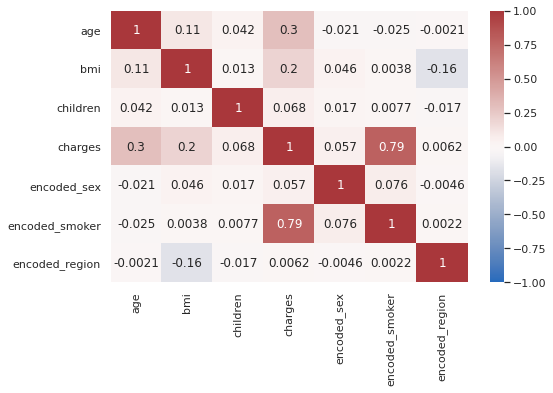

In [11]:
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df.corr(), cmap='vlag', annot=True, vmin=-1, vmax=1, center=0)
plt.savefig('1.ICP_heatmap.png')

based on the heatmap, it can be seen that smoker, age, bmi and children features are with positive association with charges feature, i.e, the higher the values for smoker, age, bmi and children features, the higher the charges value. <br> We will explore more on the smoker, age and bmi

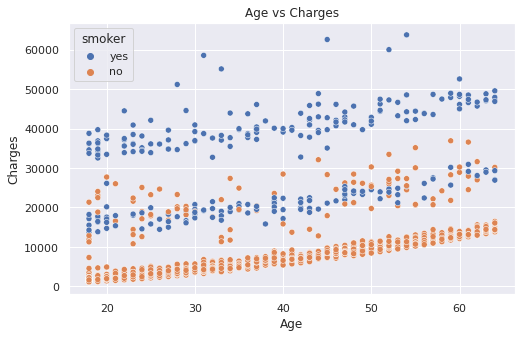

In [12]:
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.savefig('2.ICP_age_vs_charges.png')

Finding shows that increase in the age will also increase the medical charges for both smokers and non smokers. 

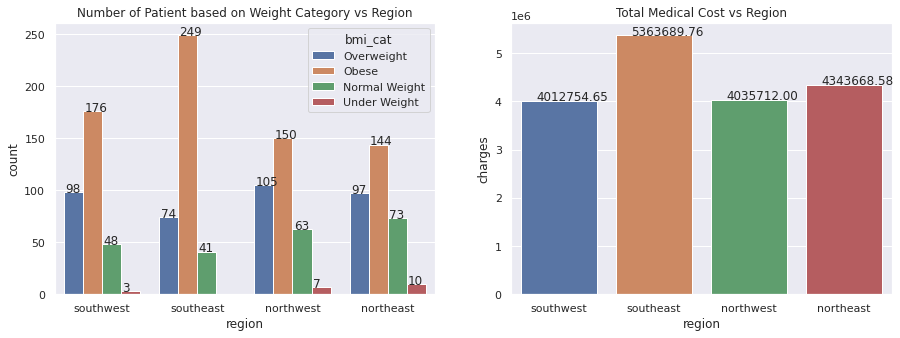

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
axs=sns.countplot(x='region', data=df, hue='bmi_cat', ax=ax[0])
for p in axs.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /15
        y = p.get_y() + p.get_height()+0
        axs.annotate(value, (x, y))   
axs.set_title('Number of Patient based on Weight Category vs Region')

axs=sns.barplot(x='region', y='charges', data=df, ci=None, estimator=sum,ax=ax[1])
for p in axs.patches:       
        value = '{0:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width() /5
        y = p.get_y() + p.get_height()+0
        axs.annotate(value, (x, y))
axs.set_title('Total Medical Cost vs Region')

plt.savefig('3.ICP_patient_count_region.png')

Southeas region is with the highest number of Obese patient and medical cost is also the highest among the 4 regions. 

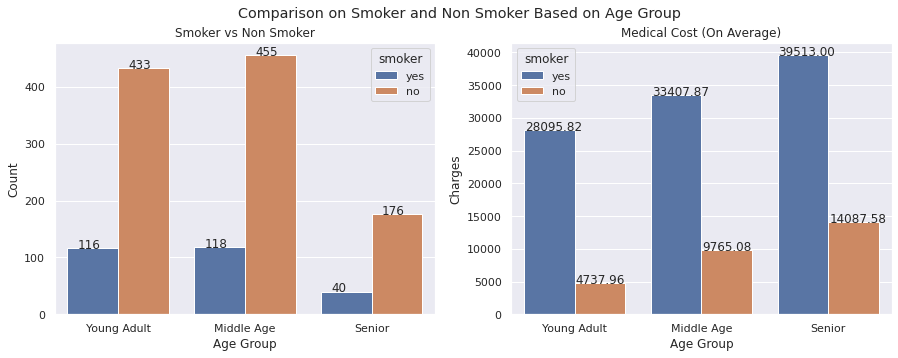

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Comparison on Smoker and Non Smoker Based on Age Group')
axs=sns.countplot(x='age_cat', data=df, hue='smoker', ax=ax[0])
axs.set_xlabel('Age Group')
axs.set_ylabel('Count')
axs.set_title('Smoker vs Non Smoker')
for p in axs.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /5
        y = p.get_y() + p.get_height()+0
        axs.annotate(value, (x, y))

axs=sns.barplot(x='age_cat', y='charges',data=df, hue='smoker', estimator=np.mean, ci=None, ax=ax[1])
axs.set_xlabel('Age Group')
axs.set_ylabel('Charges')
axs.set_title('Medical Cost (On Average)')
for p in axs.patches:       
        value = '{0:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width() /50
        y = p.get_y() + p.get_height()+0
        axs.annotate(value, (x, y)) 

plt.savefig('4.ICP_patient_age_cost.png')

Medical cost for Non Smoker <br>
Young Adult (431) - 4738.48 <br>
Middle Age (455) - 9765.08 <br>
Senior (176) - 14087.58 <br>

Medical cost for Smoker <br>
Young Adult (116) - 28095.82 <br>
Middle Age (118) - 33407.87 <br>
Senior (40) - 39513.00 <br>

In general, medical cost of smokers are higher for Young Adult, Middle Age and Senior groups as compared with non smokers. It should be noted that the number of smokers is far lesser than non smokers for each of the age group.



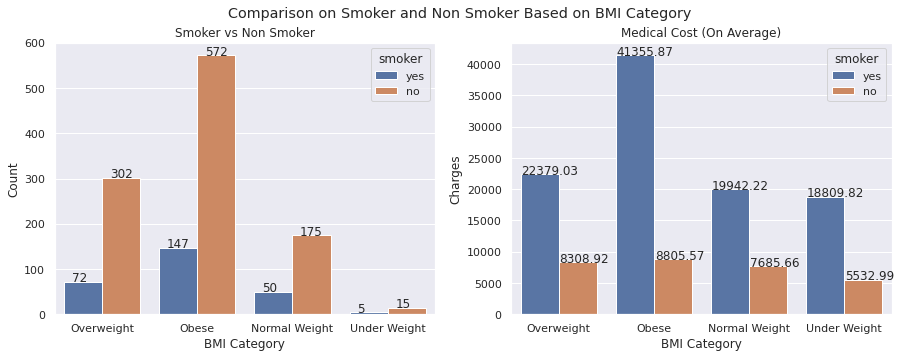

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Comparison on Smoker and Non Smoker Based on BMI Category')
axs=sns.countplot(x='bmi_cat', data=df, hue='smoker', ax=ax[0])
axs.set_xlabel('BMI Category')
axs.set_ylabel('Count')
axs.set_title('Smoker vs Non Smoker')
for p in axs.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /5
        y = p.get_y() + p.get_height()+0
        axs.annotate(value, (x, y))

axs=sns.barplot(x='bmi_cat', y='charges',data=df, hue='smoker', estimator=np.mean, ci=None, ax=ax[1])
axs.set_xlabel('BMI Category')
axs.set_ylabel('Charges')
axs.set_title('Medical Cost (On Average)')
for p in axs.patches:       
        value = '{0:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width() /50
        y = p.get_y() + p.get_height()+0
        axs.annotate(value, (x, y)) 

plt.savefig('5.ICP_patient_bmi_cost.png')

Medical cost for Non Smoker <br>
Overweight (301) - 8320.95 <br>
Obese (574) - 8832.88 <br>
Normal Weight (172) - 7599.64 <br>
Uder Weight (15) - 5532.99 <br>

Medical cost for Smoker <br>
Overweight (72) - 22379.03 <br>
Obese (147) - 41355.87 <br>
Normal Weight (50) - 19942.22 <br>
Uder Weight (5) - 18809.82 <br>

In general, medical cost (on average) of smokers are higher for Obese is the highest, followed by Overweight, Normal Weight and Under Weight. It should be noted that the number of smokers is far lesser than non smokers for each of the BMI category.


<Figure size 720x360 with 0 Axes>

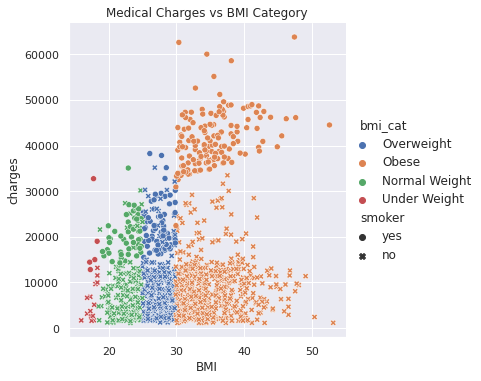

In [16]:
plt.figure(figsize=(10,5))
axs=sns.relplot(x='bmi', y='charges', data=df, hue="bmi_cat", style="smoker")
plt.title('Medical Charges vs BMI Category')
plt.xlabel('BMI')
plt.savefig('6.ICP_patient_bmiCat_cost.png')

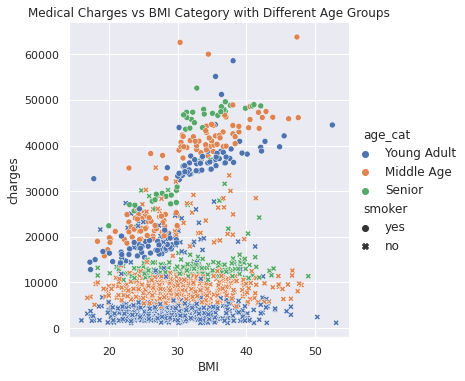

In [17]:
axs=sns.relplot(x='bmi', y='charges', data=df, hue="age_cat", style="smoker") 
plt.title('Medical Charges vs BMI Category with Different Age Groups')
plt.xlabel('BMI')
plt.savefig('7.ICP_patient_ageCat_cost.png')

The finding shows that most of the medical costs for smokers are higher than non smoker, given the same bmi. <br> Also, smokers with Obese are required to spend more on medical cost as compared to smokers with Overweight, Normal Weight and Under Weight. <br>
Also, it is obvious that smokers with Obese are needed to spend more on medical cost as compared to Overweight, Normal weight and under weight smokers, regardless to Young Adult, Middle Age and Senior age groups.


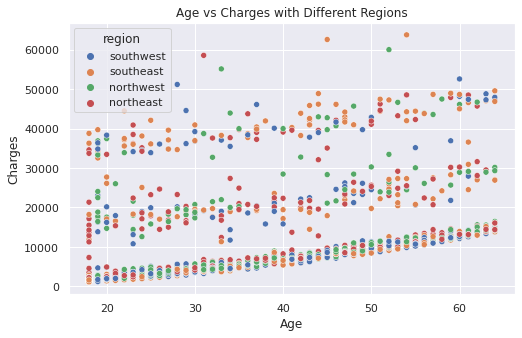

In [18]:
sns.scatterplot(x='age', y='charges', data=df, hue='region')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Different Regions')
plt.savefig('8.ICP_age_vs_charges.png')

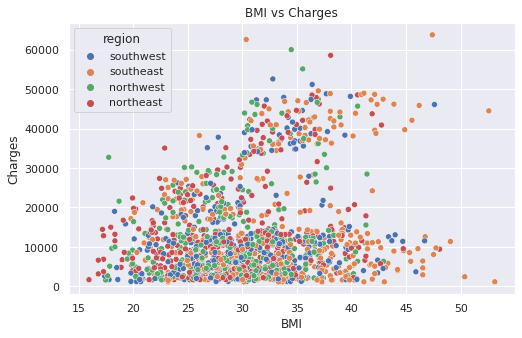

In [19]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='region')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.savefig('9.ICP_bmi_vs_charges.png')

It is found that region does not show any significant insight. This is also relfected the finding from the heatmap where there is no strong association between regions and charges.

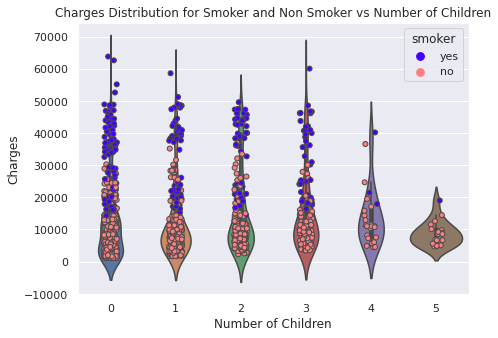

In [20]:
plt.figure(figsize=(7,5))
ax = sns.violinplot(x='children', y="charges", data=df)
sns.stripplot(x='children', y="charges", data=df, hue='smoker', edgecolor="gray",palette="gnuplot2",linewidth=1)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smoker and Non Smoker vs Number of Children')
plt.savefig('10.ICP_child_vs_charges.png')

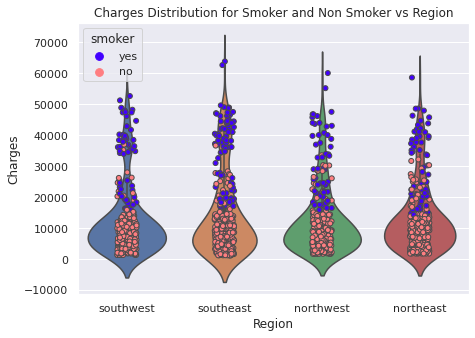

In [21]:
plt.figure(figsize=(7,5))
ax = sns.violinplot(x='region', y="charges", data=df)
sns.stripplot(x='region', y="charges", data=df, hue='smoker', edgecolor="gray",palette="gnuplot2",linewidth=1)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smoker and Non Smoker vs Region')
plt.savefig('11.ICP_region_vs_charges.png')

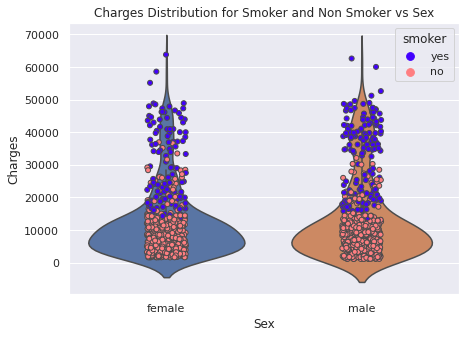

In [22]:
plt.figure(figsize=(7,5))
ax = sns.violinplot(x='sex', y="charges", data=df)
sns.stripplot(x='sex', y="charges", data=df, hue='smoker', edgecolor="gray",palette="gnuplot2",linewidth=1)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smoker and Non Smoker vs Sex')
plt.savefig('12.ICP_sex_vs_charges.png')

Based on the finding, the medical cost for smokers are higher as compared to non smokers, regardless the number of children, regions and sex of the customers.

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_cat', 'age_cat', 'encoded_sex', 'encoded_smoker',
       'encoded_region'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

df_clean=df
# le = LabelEncoder()
# df_clean['smoker'] = le.fit_transform(df['smoker'])
# df_clean['sex'] = le.fit_transform(df['sex'])

scaler = MinMaxScaler()
#df_clean[['bmi','charges']] = scaler.fit_transform(df_clean[['bmi','charges']])

columns = ['age','bmi', 'encoded_smoker']
X = df_clean[columns]
y = df_clean['charges']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

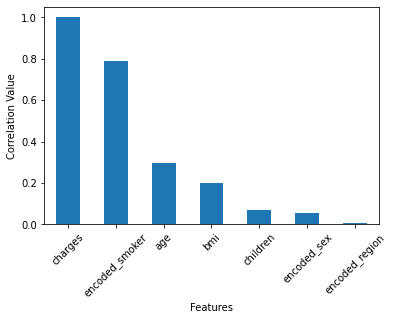

In [10]:
df_clean.corr()['charges'].sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
#plt.savefig('7.ICP_bar_corr.png')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X, y)
y_predict=lr_model.predict(X_test)

In [22]:
print ('Coefficients:', lr_model.coef_)
print ('Intercept:', lr_model.intercept_)
print ('Model performance:', lr_model.score(X,y))

print('Linear Regression Train Score is : {0:.2f}'.format(lr_model.score(X_train, y_train)*100))
print('Linear Regression Test Score is : {0:.2f}'.format(lr_model.score(X_test, y_test)*100))
print('Linear Regression Test R_Square Score is : {0:.2f}'.format(r2_score(y_test, y_predict)*100))

Coefficients: [  259.83736925   322.61300185 23827.39344353]
Intercept: -11691.638457668056
Model performance: 0.7473199558133996
Linear Regression Train Score is : 74.78
Linear Regression Test Score is : 74.51
Linear Regression Test R_Square Score is : 74.51


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X, y)
y_predict=rf_model.predict(X_test)

In [24]:
print ('Model performance:', rf_model.score(X,y))

print('Random Forest Regressor Train Score is : {0:.2f}'.format(rf_model.score(X_train, y_train)*100))
print('Random Forest Regressor Test Score is : {0:.2f}'.format(rf_model.score(X_test, y_test)*100))
print('Random Forest Regressor Test R_Square Score is : {0:.2f}'.format(r2_score(y_test, y_predict)*100))

Model performance: 0.9699323416799394
Random Forest Regressor Train Score is : 97.00
Random Forest Regressor Test Score is : 96.96
Random Forest Regressor Test R_Square Score is : 96.96
